In [122]:
#Load the Data Dataset
from keras.datasets import imdb
((XT,YT),(Xt,Yt)) = imdb.load_data(num_words=10000)

In [123]:
print(len(XT))
print(len(Xt))

25000
25000


In [124]:
print(XT[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [125]:
print(XT[0])
print(len(XT[0]))

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
218


In [126]:
word_idx = imdb.get_word_index()

In [127]:
type(word_idx)

dict

In [128]:
# count=0
# for (x,y) in word_idx.items():
#     if(count == 10):
#         break
#     print(x," ", y)
#     print()
#     count+=1

list(word_idx.keys())[1],list(word_idx.values())[1]

('tsukino', 52006)

In [129]:
# print(word_idx.items())
print(len(word_idx))

88584


In [130]:
idx_word =  dict([val,key] for (key, val) in word_idx.items())
actual_review = ' '.join([idx_word.get(idx-3, '?') for idx in XT[0]])
print(actual_review)
print(len(actual_review.split()))

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

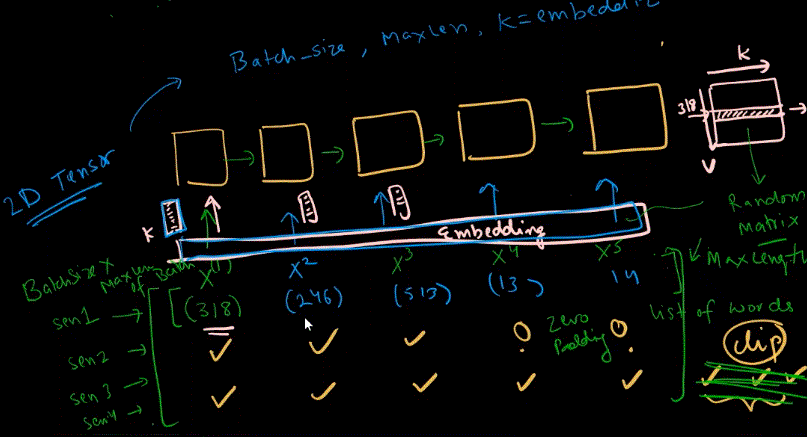

In [131]:
## creating 2d tensor that has to be processed by the embedding layer
from keras.preprocessing import sequence

In [132]:
X_train = sequence.pad_sequences(XT, maxlen = 500)
X_test = sequence.pad_sequences(Xt, maxlen = 500)

In [133]:
X_train.shape

(25000, 500)

In [134]:
X_test.shape

(25000, 500)

In [135]:
#create model in keras

from keras.layers import Embedding,SimpleRNN, Dense
from keras.models import Sequential

In [136]:

model = Sequential()
model.add(Embedding(10000,64))# 10000 is vocab size and 10 is 10dimentional output 
model.add(SimpleRNN(32))  # creates layer of RNN cell, 32 is shape of activation vector that we are passing to the next cell
model.add(Dense(1,activation='sigmoid'))#32 dimentional vector -> dense layer -> classified (0/1 class)
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, None, 64)          640000    
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, 32)                3104      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 643,137
Trainable params: 643,137
Non-trainable params: 0
_________________________________________________________________


In [137]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, None, 64)          640000    
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, 32)                3104      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 643,137
Trainable params: 643,137
Non-trainable params: 0
_________________________________________________________________


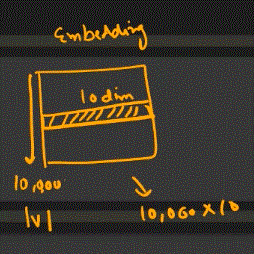

In [138]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])

In [139]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, None, 64)          640000    
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, 32)                3104      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 643,137
Trainable params: 643,137
Non-trainable params: 0
_________________________________________________________________


In [145]:
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
checkpoint = ModelCheckpoint('imdbmodel',monitor = 'val_loss', verbose = 0, save_best_only = False, save_weights_only =  False, mode = 'auto', period = 1)
earlystop = EarlyStopping(monitor = 'val_acc', patience = 2)
hist = model.fit(X_train,YT,epochs=10, validation_split=0.2, batch_size =128, callbacks = [checkpoint])

Epoch 1/10
157/157 [==============================] - 44s 283ms/step - loss: 0.0220 - acc: 0.9945 - val_loss: 0.6725 - val_acc: 0.8204
Epoch 2/10
157/157 [==============================] - 47s 302ms/step - loss: 0.0091 - acc: 0.9976 - val_loss: 0.7159 - val_acc: 0.8158
Epoch 3/10
157/157 [==============================] - 41s 264ms/step - loss: 0.0116 - acc: 0.9969 - val_loss: 0.7449 - val_acc: 0.8152
Epoch 4/10
157/157 [==============================] - 43s 276ms/step - loss: 0.0119 - acc: 0.9966 - val_loss: 0.7893 - val_acc: 0.7980
Epoch 5/10
157/157 [==============================] - 41s 263ms/step - loss: 0.0082 - acc: 0.9976 - val_loss: 0.8390 - val_acc: 0.7932
Epoch 6/10
157/157 [==============================] - 42s 270ms/step - loss: 0.0038 - acc: 0.9988 - val_loss: 1.0793 - val_acc: 0.7366
Epoch 7/10
157/157 [==============================] - 43s 276ms/step - loss: 0.0056 - acc: 0.9983 - val_loss: 0.8336 - val_acc: 0.8128
Epoch 8/10
157/157 [==============================] - 4

In [141]:
h = hist.history

In [148]:
import matplotlib.pyplot as plt

In [149]:
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'val'], loc='upper left')
# plt.show()

In [150]:
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'val'], loc='upper left')
# plt.show()

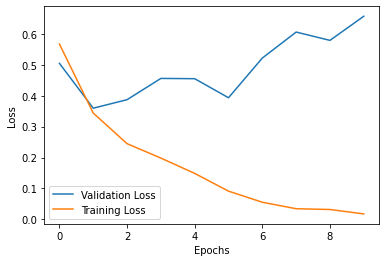

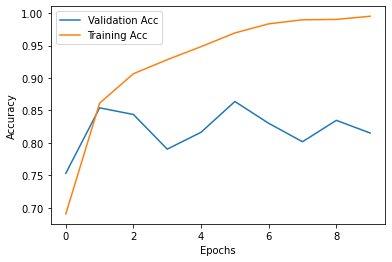

In [151]:
plt.plot(h['val_loss'],label="Validation Loss")
plt.plot(h['loss'],label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


plt.plot(h['val_acc'],label="Validation Acc")
plt.plot(h['acc'],label="Training Acc")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [152]:
#model.save('imdbmodel.h5') # hdf5 format

In [153]:
!dir

 Volume in drive C is OS
 Volume Serial Number is 8ADB-680F

 Directory of C:\Users\dell\Desktop\Machine Learning\Recurrent Nueral Networks (RNNs)

07-03-2021  10:43    <DIR>          .
07-03-2021  10:43    <DIR>          ..
07-03-2021  08:22    <DIR>          .ipynb_checkpoints
06-03-2021  14:04             4,917 download.png
06-03-2021  12:13            26,756 f1.GIF
06-03-2021  18:19            16,777 f10.GIF
07-03-2021  08:22            35,826 f11.GIF
07-03-2021  08:33            20,763 f12.GIF
06-03-2021  12:33            11,529 f2.GIF
06-03-2021  12:45            26,576 f3.GIF
06-03-2021  14:05            29,621 f4.GIF
06-03-2021  17:32            31,053 f5.GIF
06-03-2021  17:38            13,936 f6.GIF
06-03-2021  17:52            26,998 f7.GIF
06-03-2021  17:53            15,255 f8.GIF
06-03-2021  18:00            15,657 f9.GIF
06-03-2021  22:01    <DIR>          IMDB
07-03-2021  10:43           135,357 IMDB Review Sentiment Analysis.ipynb
07-03-2021  10:44    <DIR>          im

In [112]:
model.load_weights('imdbmodel.h5')

In [116]:
arr = model.evaluate(X_test,Yt)

782/782 [==============================] - 24s 31ms/step - loss: 0.8104 - acc: 0.8039


In [117]:
print('Testing Loss', arr[0])
print('Accuracy', arr[1])

Testing Loss 0.8104390501976013
Accuracy 0.803879976272583


In [118]:
model.evaluate(X_train, YT)

782/782 [==============================] - 22s 28ms/step - loss: 0.1630 - acc: 0.9600


[0.16299261152744293, 0.9599999785423279]

In [119]:
# callback in keras is like calling some function after each epochs so that we get best model
#https://keras.io/api/callbacks/